In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams.update({
    
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size' : 14
})

%config InlineBackend.figure_formats = ['svg']

In [237]:
############
############
# Adastra
############
df_mi250 = pd.read_csv("log/describe_all_adastra_gpu.csv") #MI250x
# df_epyc = pd.read_csv("log/describe_all_cpu_epyc.csv") #AMD EPYC 7A53 64-Core Processor
# df_mi250 = pd.read_csv("log/new-runs/describe_mi250.csv")
df_epyc  = pd.read_csv("log/new-runs/describe_epyc.csv")

############
# DPCPP
df_dpcpp_epyc = pd.read_csv("log/dpcpp/describe_epyc_dpcpp.csv")
df_dpcpp_genoa = pd.read_csv("log/dpcpp/describe_genoa_dpcpp.csv")

############
############
# Ruche
############
# df_a100  = pd.read_csv("log/describe_all_ruche_gpu.csv")
# df_xeon  = pd.read_csv("log/describe_all_ruche_cpu.csv")
df_a100  = pd.read_csv("log/new-runs/describe_a100.csv")
df_xeon  = pd.read_csv("log/new-runs/describe_xeon.csv")

############
# DPCPP
df_dpcpp_xeon  = pd.read_csv("log/dpcpp/describe_all_ruche_cpu_dpcpp.csv")


dfs = [df_mi250, df_epyc, df_a100, df_xeon, df_dpcpp_epyc, df_dpcpp_genoa, df_dpcpp_xeon]
import math
for df in dfs:
    df.drop(df[(df['error_mean']>10e-6)].index, inplace=True)
    df.drop(df[(df['error_mean'].isna())].index, inplace=True)
    df.drop(df[(df['error_mean'] == 0)].index, inplace=True)
    # df.drop(df[()].index, inplace=True)
    # df.dropna(axis = 0, how = 'all', inplace=True)

In [238]:
def create_list_from_df(df):

    kernels_name = df["kernel"].unique()

    values_all_kernels = {
        #'kernel_name': ([size1,size2,size3], [value1, value2, value3])
    }

    for kernel_type in kernels_name:
        val_one_kernel = df[df["kernel"] == kernel_type]
        values_all_kernels[kernel_type] = (val_one_kernel["global_size"],
                                           val_one_kernel['throughput_mean'],
                                           val_one_kernel['throughput_std'])

    return values_all_kernels

def plot_values(values : dict, title : str) :
    fig = plt.figure()#figsize=(12,12)
    ax  = fig.add_subplot(111)

    for key, data in values.items():
        sizes, perf, std = data

        # ax.plot(sizes,
        #             perf,
        #             # perf*10e9,
        #             'x-', label=key)
        ax.errorbar(sizes, perf, capsize=1, yerr=std, label=key)

    ax.set_title(title)
    ax.set_ylabel('Average throughput (GB/s)')
    ax.set_xlabel('Global size ($n_x \\times n_{y}$ with $n_x = 1024 $)')
    ax.set_xscale('log', base=10)

    ax.legend()
    ax.grid()
    
    # fig.savefig(f"plot{title}.pdf")
    plt.show()

In [239]:
def create_subplots(v: list, titles: list):
    fig = plt.figure(figsize=(12,10))#, constrained_layout=True)
    # fig = plt.figure()
    ax = fig.add_subplot(111)    # The big subplot
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    subfigs=[ax1, ax2, ax3, ax4]
    
    # Tracer les données
    for key, data in v[0].items():
        sizes, perf, std = data


        ax1.plot(sizes, perf, 'x-', label=key)
        
        #fake plot to set the legend
        ax.plot(0, 0, label=key)
        
    for i, vv in enumerate(v[1:]):
        for key, data in vv.items():
            sizes, perf, std = data
            
            subfigs[i+1].plot(sizes, perf, 'x-', label=key)


    box = ax.get_position()

    ax.legend(loc='lower center', bbox_to_anchor=(box.width/2 + 0.11, box.width/2 + 0.66), fancybox=True, shadow=True, ncol=5)

    #set common labels (i.e. the labels of the large subplot)
    ax.set_ylabel('Average throughput (GB/s)')
    ax.set_xlabel('Global size ($n_x \\times n_{y}$ with $n_x = 1024 $)')

    #Turn off axis for the large subplot
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    ax1.set_title(titles[0])
    ax2.set_title(titles[1])
    ax3.set_title(titles[2])
    ax4.set_title(titles[3])

    for subfig in subfigs:
        subfig.grid(True)
        subfig.set_xscale('log', base=10)

    plt.show()
    fig.savefig("multiplot.pdf")

In [240]:
val_epyc  = create_list_from_df(df_epyc)
val_mi250 = create_list_from_df(df_mi250)
val_xeon = create_list_from_df(df_xeon)
val_a100 = create_list_from_df(df_a100)

val_xeon_dpcpp = create_list_from_df(df_dpcpp_xeon)
val_epyc_dpcpp = create_list_from_df(df_dpcpp_epyc)
val_genoa_dpcpp = create_list_from_df(df_dpcpp_genoa)


In [241]:
# create_subplots([val_epyc, val_xeon, val_mi250, val_a100],
#                 ["CPU EPYC acpp", "CPU Xeon Gold acpp", "GPU MI250 acpp", "GPU A100 acpp"])

In [242]:
# plot_values(val_epyc, "CPU EPYC acpp")
# plot_values(val_mi250, "GPU MI250 acpp")
# plot_values(val_xeon, "CPU Xeon Gold acpp")
# plot_values(val_a100, "GPU A100 acpp")

# plot_values(val_xeon_dpcpp, "CPU Xeon Gold dpcpp")
# plot_values(val_epyc_dpcpp, "CPU EPYC dpcpp")
# plot_values(val_genoa_dpcpp, "CPU GENOA dpcpp")



In [243]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None) 
# pd.read_csv("log/new-runs/describe_a100.csv")

In [244]:
KCOLORS = [("BasicRange2D", "C0"),
           ("BasicRange1D", "C1"),
           ("NDRange",      "C4"),
           ("Hierarchical", "C2"),
           ("Scoped",       "C3"), ]

def plot_all_general_perf(values: list):
    #values = [(val_acpp, val_dpcpp, title), ...]
    fig = plt.figure(figsize=(15,10))#, constrained_layout=True)
    ax = fig.add_subplot(111)    # The big subplot for legend
    #gpu
    ax1 = fig.add_subplot(231)
    ax2 = fig.add_subplot(232)
    #cpu
    ax3 = fig.add_subplot(234)
    ax4 = fig.add_subplot(235)
    ax5 = fig.add_subplot(236)
    
    subfigs=[ax1, ax2, ax3, ax4, ax5]
    
    #empty plot to fix legend
    for kernel_name, kernel_color in KCOLORS:
        ax.plot(0,0, label=kernel_name, color=kernel_color)
    ax.plot(0, 0, '-', color='k', label="\\texttt{acpp}")
    ax.plot(0, 0, '--', color='k', label="\\texttt{dpc++}")

    #plot actual values
    for i, vi in enumerate(values):
        for compiler_id, data_compiler in enumerate(vi[:-1]): #:-1 to get rid of the title
            if(data_compiler is not None):
                for key, data in data_compiler.items():
                    sizes, perf, std = data

                    current_color = next((c[1] for c in KCOLORS if c[0] == key), "")
                    if(current_color != ""):
                        plot_style = 'x-'

                        if(compiler_id == 1): #it's dpcpp
                            plot_style = 'x--'

                        subfigs[i].plot(sizes, perf, plot_style, color=current_color, label=key)


    box = ax.get_position()

    # ax.legend(loc='lower center', bbox_to_anchor=(box.width/2 + 0.11, box.width/2 + 0.66), fancybox=True, shadow=True, ncol=5)
    ax.legend(fontsize=18, fancybox=True, shadow=True, bbox_to_anchor=(box.width/2 + 0.57, box.width/2 + 0.56),)

    #set common labels (i.e. the labels of the large subplot)
    ax.set_ylabel('Average throughput (GB/s)')
    ax.set_xlabel('Global size ($n_x \\times n_{y}$ with $n_x = 1024 $)')

    #Turn off axis for the large subplot
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i, subfig in enumerate(subfigs):
        subfig.set_title(values[i][2])
        subfig.grid(True)
        subfig.set_xscale('log', base=10)

    # plt.show()
    fig.savefig("multiplot.pdf")




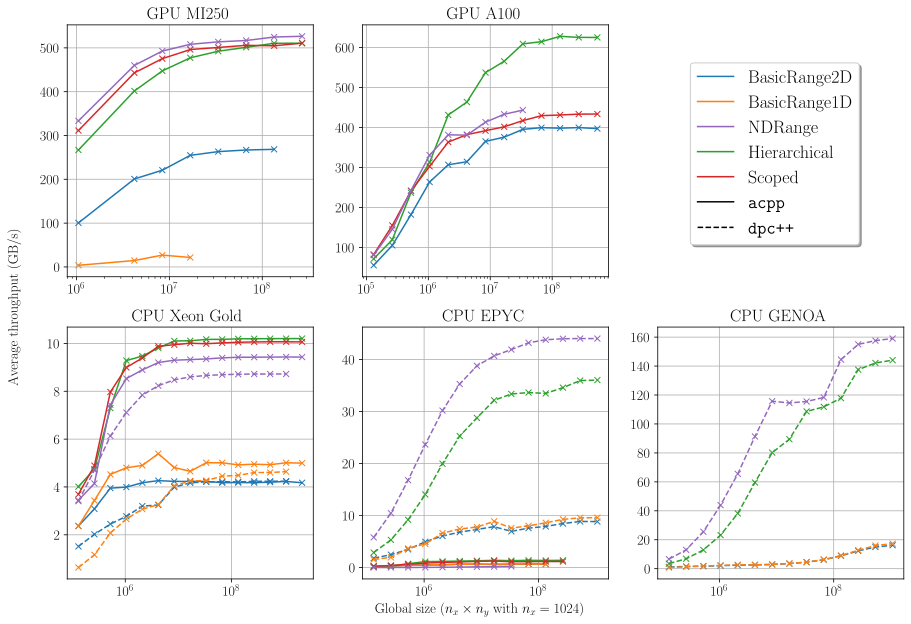

In [246]:
all_values=[
    #(val_acpp, val_dpcpp, title)
    (val_mi250, None,            "GPU MI250"),
    (val_a100,  None,            "GPU A100"),
    (val_xeon,  val_xeon_dpcpp,  "CPU Xeon Gold"),
    (val_epyc,  val_epyc_dpcpp,  "CPU EPYC"),
    (None,      val_genoa_dpcpp, "CPU GENOA")
]

plot_all_general_perf(all_values)